/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/Users/Zhonghou/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Weights: [-1.55210164  0.61957589 -4.99997687]


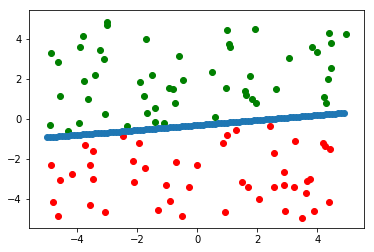

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution as de

def sigmoid (x):
    return 1 / (1+np.exp (-20*x))

def logit (x):
    return np.log (x / (1-x))

def phi (weights, x):
    return np.dot (x, weights)

def log_likelihood (weights, X0, X1):
    total  = 0
    for x0 in X0:
        total += np.log (sigmoid (phi (weights, x0)))
    for x1 in X1:
        total += np.log (1 - sigmoid (phi (weights, x1)))
    return total

def sample_points (num_points, num_predictors, start, end):
    X = []
    for point_num in range (num_points):
        point = [1]
        for predictor_num in range (num_predictors):
            value = np.random.uniform (start, end)
            point.append (value)
        X.append (point)
    return X

def separate_classes (weights, X):
    X0, X1 = [], []
    for x in X:
        if phi (weights, x) < 0:
            X0.append (x)
        else:
            X1.append (x)
    return np.array(X0), np.array(X1)

def scatter (X, option):
    x1 = [row[1] for row in X]
    x2 = [row[2] for row in X]
    plt.scatter (x1, x2, c=option)
    
def plot_division_line (weights, start, end):
    x_test = np.arange (start, end, .1)
    y_test = [1/weights[2]*(-weights[0] - weights[1]*x) for x in x_test]
    plt.scatter (x_test, y_test)
    
def residual (weights, X0, X1):
    return np.matmul (X1.T, 1 - sigmoid (phi (weights,X1))) - np.matmul (X0.T, sigmoid (phi (weights,X0)))

def main():
    X = sample_points (100, 2, -5, 5)
    target_weights = [1,-1,5]
    X0, X1 = separate_classes (target_weights, X)
    def f(weights):
        return -log_likelihood (weights, X0, X1)
    weights = de(f, [(-5,5), (-5, 5), (-5,5)]).x
    scatter (X0, 'red')
    scatter (X1, 'green')
    plot_division_line (weights, -5, 5)
    print ('Weights:', weights)
    
    
    
    
    

main()